In [2]:
from keras import backend as K
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Flatten
from keras.layers.core import Dense, Activation
from keras.datasets import mnist
from keras.utils import np_utils
from keras.optimizers import SGD, RMSprop, Adam
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
#define the ConvNet
class LeNet:
    @staticmethod
    def build(input_shape, classes):
        model = Sequential()
        model.add(Conv2D(20, kernel_size=5, padding='same', input_shape=input_shape))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        
        model.add(Conv2D(50, kernel_size=5, border_mode='same'))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        
        model.add(Flatten())
        model.add(Dense(100))
        model.add(Activation('relu'))
        model.add(Dense(classes))
        model.add(Activation('softmax'))
        return model

60000 train samples
10000 test samples


c:\python35\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(50, padding="same", kernel_size=5)`
  # Remove the CWD from sys.path while we load stuff.


Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 274s - loss: 0.2157 - acc: 0.9360 - val_loss: 0.0787 - val_acc: 0.9759
Epoch 2/5
48000/48000 [==============================] - 256s - loss: 0.0586 - acc: 0.9818 - val_loss: 0.0618 - val_acc: 0.9806
Epoch 3/5
48000/48000 [==============================] - 258s - loss: 0.0410 - acc: 0.9873 - val_loss: 0.0531 - val_acc: 0.9852
Epoch 4/5
48000/48000 [==============================] - 256s - loss: 0.0287 - acc: 0.9913 - val_loss: 0.0438 - val_acc: 0.9867
Epoch 5/5
 9984/10000 [============================>.] - ETA: 0sTest score: 0.0427038129509
Test accuracy: 0.9866
dict_keys(['val_acc', 'val_loss', 'loss', 'acc'])


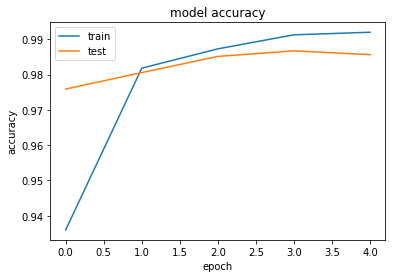

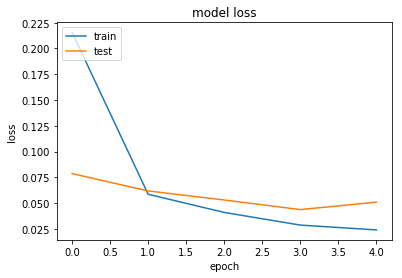

In [5]:
NB_EPOCH = 5
BATCH_SIZE = 128
VERBOSE = True
OPTIMIZER = Adam()
VALIDATION_SPLIT = 0.2
IMG_ROWS, IMG_COLS = 28, 28
NB_CLASSES = 10
INPUT_SHAPE = (1, IMG_ROWS, IMG_COLS)
(X_train, y_train), (X_test, y_test) = mnist.load_data()
K.set_image_dim_ordering('th')
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
X_train = X_train[:, np.newaxis, :, :]
X_test = X_test[:, np.newaxis, :, :]
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
y_train = np_utils.to_categorical(y_train, NB_CLASSES)
y_test = np_utils.to_categorical(y_test, NB_CLASSES)

model = LeNet.build(input_shape=INPUT_SHAPE, classes=NB_CLASSES)
model.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCH, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
score = model.evaluate(X_test, y_test, verbose=VERBOSE)
print('Test score:', score[0])
print('Test accuracy:', score[1])
print(history.history.keys())
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
